# **Introduction to the modeling and simulation of Cellular Wireless Communication Systems - Part 3**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import display, HTML

#  Exercise 1

In [67]:
# Constants
f = 10  # frequency in Hz
T = 1   # total simulation time in seconds
fs = 10000  # sampling frequency in Hz (10 kHz)
time = np.arange(0, T, 1/fs)  # time vector

# LOS signal (no delay)
s_los = np.sin(2 * np.pi * f * time)

# Create delayed signal of 10 ms
s_reflected_pos1 = np.sin(2 * np.pi * f * (time - 0.010))

# Create delayed signal of 54 ms
s_reflected_pos2 = np.sin(2 * np.pi * f * (time - 0.054))


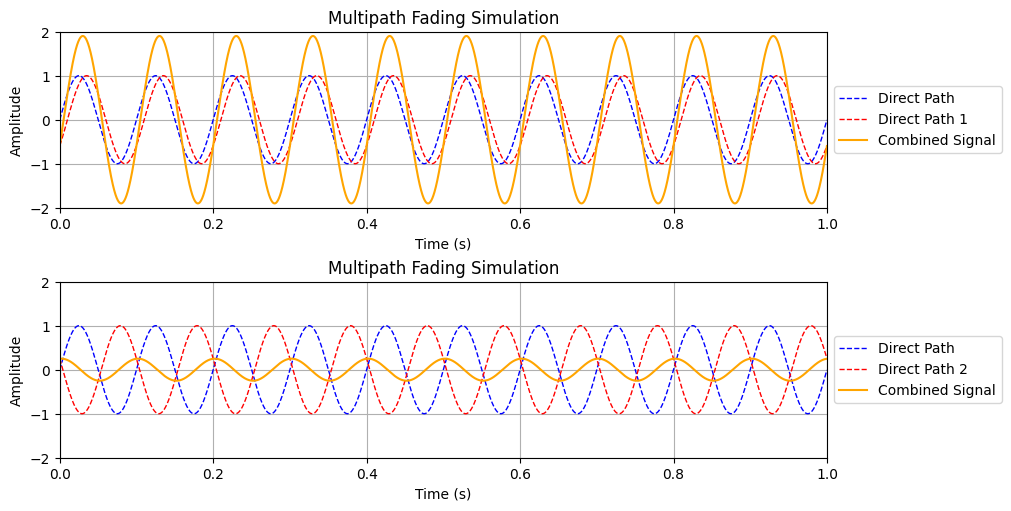

In [68]:
fig, graf = plt.subplots(2, figsize = (10, 5), constrained_layout=True)
graf[0].plot(time, s_los, linestyle="--", color="b", linewidth=1, label="Direct Path")
graf[0].plot(time, s_reflected_pos1, linestyle="--", color="r", linewidth=1,label="Direct Path 1")
graf[0].plot(time, s_los + s_reflected_pos1, color="orange", label="Combined Signal")
graf[0].set(title="Multipath Fading Simulation", xlabel = "Time (s)", ylabel = "Amplitude", xlim =(0, 1), ylim=(-2, 2))
graf[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
graf[0].grid(True)

graf[1].plot(time, s_los, linestyle="--", color="b", linewidth=1, label="Direct Path")
graf[1].plot(time, s_reflected_pos2, linestyle="--", color="r", linewidth=1, label="Direct Path 2")
graf[1].plot(time, s_los + s_reflected_pos2, color="orange", label="Combined Signal")
graf[1].set(title="Multipath Fading Simulation", xlabel = "Time (s)", ylabel = "Amplitude", xlim =(0, 1), ylim=(-2, 2))
graf[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
graf[1].grid(True)

plt.show()


# Exercise 2

In [ ]:
# Parâmetros
f = 10        # frequência da senoide em Hz
fs = 10000    # taxa de amostragem
time = np.arange(0, 1, 1/fs)

s_los = np.sin(2 * np.pi * f * time)
delays_s = np.arange(10, 55, 1) / 1000       # delay de 10 a 54 ms

fig, graf = plt.subplots(figsize = (10, 5), constrained_layout=True)
graf.plot(time, s_los, linestyle="--", color="b", linewidth=1, label="Direct Path")
line1, = graf.plot(time, s_los, linestyle="--", color="r", linewidth=1,label="Direct Path 1")
line2, = graf.plot(time, s_los, color="orange", label="Combined Signal")
text = graf.text(0.8, 1.6, '', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
graf.set(title="Multipath Fading Simulation", xlabel = "Time (s)", ylabel = "Amplitude", xlim =(0, 1), ylim=(-2, 2))
graf.legend(loc='center left', bbox_to_anchor=(1, 0.5))
graf.grid(True)

def update(frame):
    s_reflected = np.sin(2 * np.pi * f * (time - delays_s[frame]))
    line1.set_data(time, s_reflected)
    line2.set_data(time, s_los + s_reflected)
    text.set_text(f"{int(delays_s[frame]*1000)} ms")
    return line1, line2,  text

ani = animation.FuncAnimation(fig, update, frames=len(delays_s), interval=100, blit=True)
plt.close(fig)

# Exibir diretamente no notebook (como HTML5 vídeo)
display(HTML(ani.to_jshtml()))

# Exercise 3

In [105]:
N = int(1e6)
sigma_r = 1 #1/np.sqrt(2)
x1 = np.random.normal(0, sigma_r, N)
x2 = np.random.normal(0, sigma_r, N)

# Vetor Rayleigh
r = np.sqrt(x1**2 + x2**2)

print(f"mean(r): {np.mean(r):.4f} (Teórico: {sigma_r*np.sqrt(np.pi/2):.4f})")
print(f"mean(r²): {np.mean(r**2):.4f} (Teórico: {2*(sigma_r**2):.4f})")
print(f"var(r): {np.var(r):.4f} (Teórico: {((sigma_r**2)*(4 - np.pi)/2):.4f})")

mean(r): 1.2538 (Teórico: 1.2533)
mean(r²): 2.0009 (Teórico: 2.0000)
var(r): 0.4289 (Teórico: 0.4292)


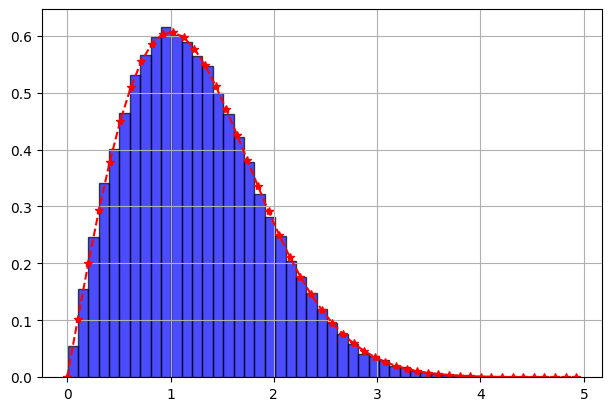

In [101]:
# PDF teórica
r_vals = np.linspace(0, np.max(r), int(10*np.max(r)))
pdf = (r_vals/(sigma_r**2)) * np.exp(-r_vals**2 / 2*(sigma_r**2))

fig, graf = plt.subplots(figsize = (6, 4), constrained_layout=True)
count, bins, _ = graf.hist(r, bins=int(10*np.max(r)), density=True, alpha=0.7, edgecolor='black', color="b")
graf.plot(r_vals, pdf, color='red', marker='*', linestyle="--")
graf.grid(True)
plt.show()

# Exercise 4